<a href="https://colab.research.google.com/github/Sulaiman29/BDA_HW3/blob/main/Copy_of_BDA2025Spring_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 03</font></center></h1>
<h2><center> <font color='black'> Classification & Evaluation</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2025</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID.

- Please provide code where ever applicable.

- The accepted submission format is .ipynb file. If you are sharing Colab link, make sure that the privacy settings for the file is public so we can access your code.

- The submission will automatically close on <font color='red'>**20 April at 23:59**</font>, so please make sure to submit before the deadline.

- ONLY one of the teammates should submit the homework and in the submission description the other person's Name and Student ID must be entered. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY.

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues.

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://ut.ee/en/content/academic-fraud).

- <font color='red'>**DO NOT CHANGE THE TEMPLATE**</font>

- <font color='red'>**Restart the Kernel and Run all the cells once again after you are done.**</font>
This will ensure that all the cells run without error. You will find an option in the top menu bar under Kernel tab.

**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name:Sulaiman Javed </font>&emsp;   <font color='red'>Student ID: </font>


<font color='red'>Name:MD Murad Misu </font>&emsp;   <font color='red'>Student ID: </font>




### The homework is divided into four sections and the points are distributed as below:
<pre>
- Classification tasks       -> 9.5 points
- Improving classification   -> 2.5 points
__________________________________________
Total                        -> 12 points
</pre>

# 1. Classification tasks (9.5 points)

We are going to use the dataset from the file HR_Employee_Attrition.csv which contains data about the employees of a company and the fact if they have left the company due to reasons like retirement, resignation, elimination of a position, personal health, etc. It is important for companies to predict if their employees are going to leave because the hiring process is costly and requires planification. The data has the following columns:


Age – self descriptive

BusinessTravel – how frequent employee travels

DailyRate – daily rate on terms of salary

Department – self descriptive

DistanceFromHome – distance between employee home and work

Education – education level of employee

EducationField – self descriptive

EnvironmentSatisfaction – level of satisfaction with working environment

Gender – self descriptive

HourlyRate – self descriptive

JobRole – self descriptive

JobInvolvement – level of interest of the job

JobSatisfaction – level of satisfaction with current job

MaritalStatus – self descriptive

MonthlyIncome – self descriptive

MonthlyRate – self descriptive

NumCompaniesWorked – self descriptive

Over18 – whether customer age is more than 18

OverTime – whether customer works overtime or not

PerformanceRating – performance level of employee

RelationshipSatisfaction – level of satisfaction with working community

StandardHours – standard amount of hours that employee works

TotalWorkingYears – Amount of working years

TrainingTimesLastYear – How many times did employee get training over the last year

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
hr_data = pd.read_csv('HR_Employee_Attrition.csv', header=0)
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,80,6,3,3,2,2,2,2


## 1.1 Dataset exploration (1.7 points)

**1.1.0.
Plot the correlation of the variables against ```Attrition```. (0.5 points)<br>Make sure you perform necessary preprocessing required for the plot.**

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


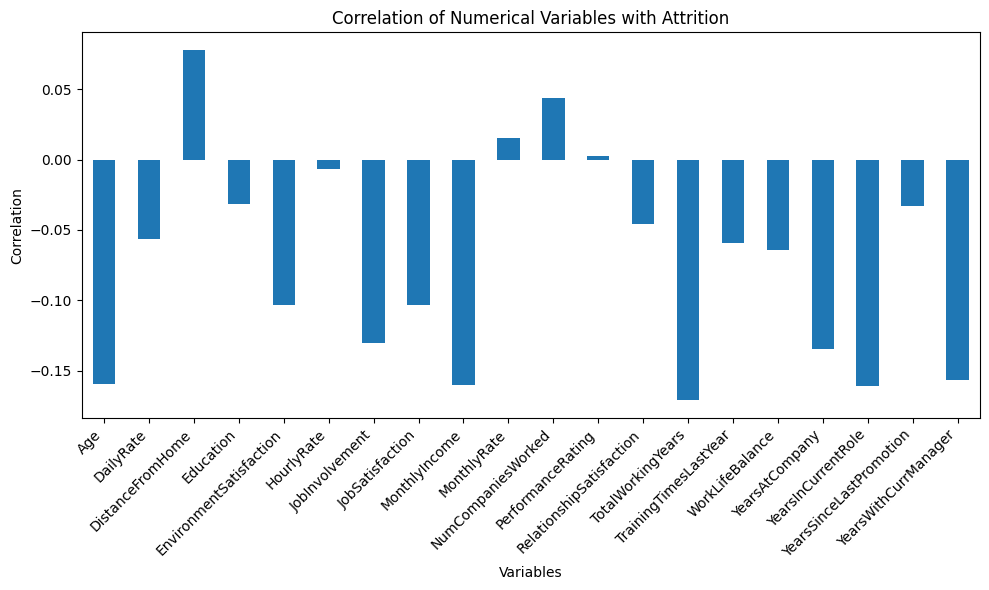

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

hr_data = pd.read_csv('HR_Employee_Attrition.csv', header=0)

# Preprocessing: Convert 'Attrition' to numerical (0 and 1)
hr_data['Attrition'] = hr_data['Attrition'].map({'Yes': 1, 'No': 0})

# Select numerical columns for correlation analysis
numerical_cols = hr_data.select_dtypes(include=np.number).columns

# Calculate correlations
correlations = hr_data[numerical_cols].corrwith(hr_data['Attrition'])
correlations = correlations.drop('Attrition')

# Filter out correlations with NaN values
correlations = correlations.dropna()

# Plotting the correlation
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Correlation of Numerical Variables with Attrition')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<font color='red'> **Answer:**</font>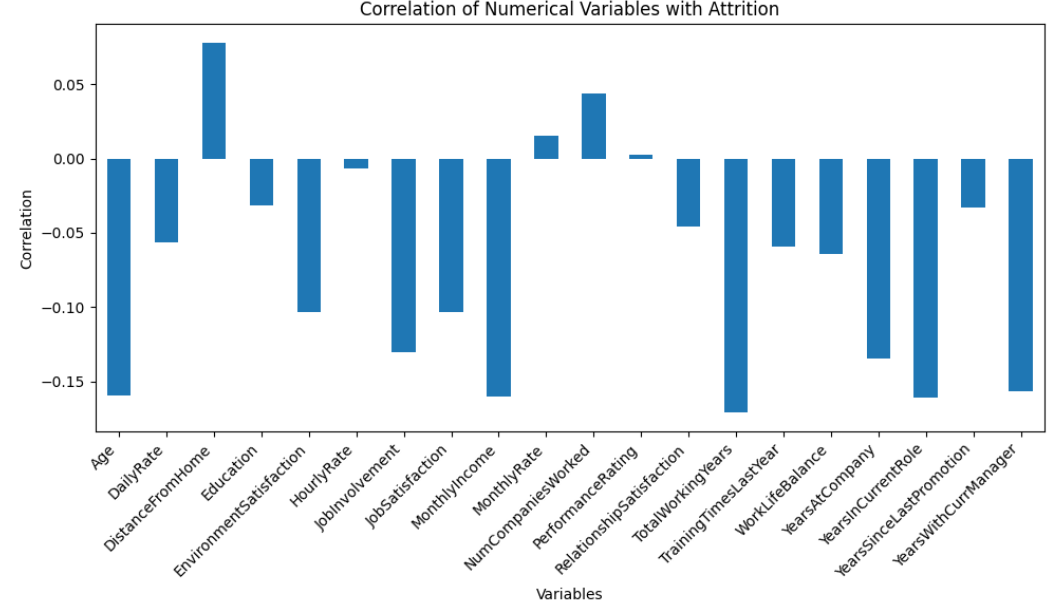

**1.1.1. Write three interesting observation that you notice. (0.5 points)**

**<font color='red'>Answer 1:</font>** DistanceFromHome has a positive correlation. This means that Employees who live farther from work are slightly more likely to leave the company.

**<font color='red'>Answer 2:</font>**Monthly Income and Age are also Highly Negatively Correlated. We can deduce that Older and better-paid employees tend to stay longer, possibly due to stability, benefits, or seniority.

**<font color='red'>Answer 3:</font>**Years at Company, Years in Current Role, and Years Since Last Promotion are Strongly Negatively Correlated. These 3 variables suggest that Employees who have spent more time at the company or in their current role are less likely to leave.

**1.1.2 Plot a boxplot for ```TotalWorkingYears``` for both Attrition categories. Explain the result. (0.4 points)**

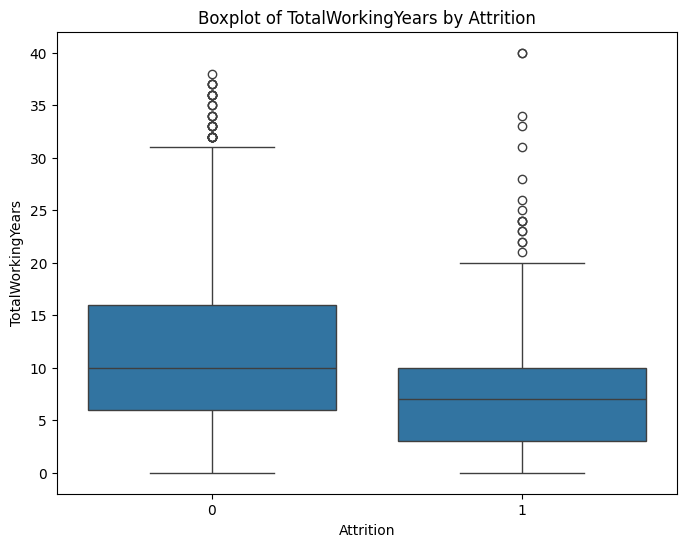

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=hr_data)
plt.title('Boxplot of TotalWorkingYears by Attrition')
plt.xlabel('Attrition')
plt.ylabel('TotalWorkingYears')
plt.show()

**<font color='red'>Answer:</font>**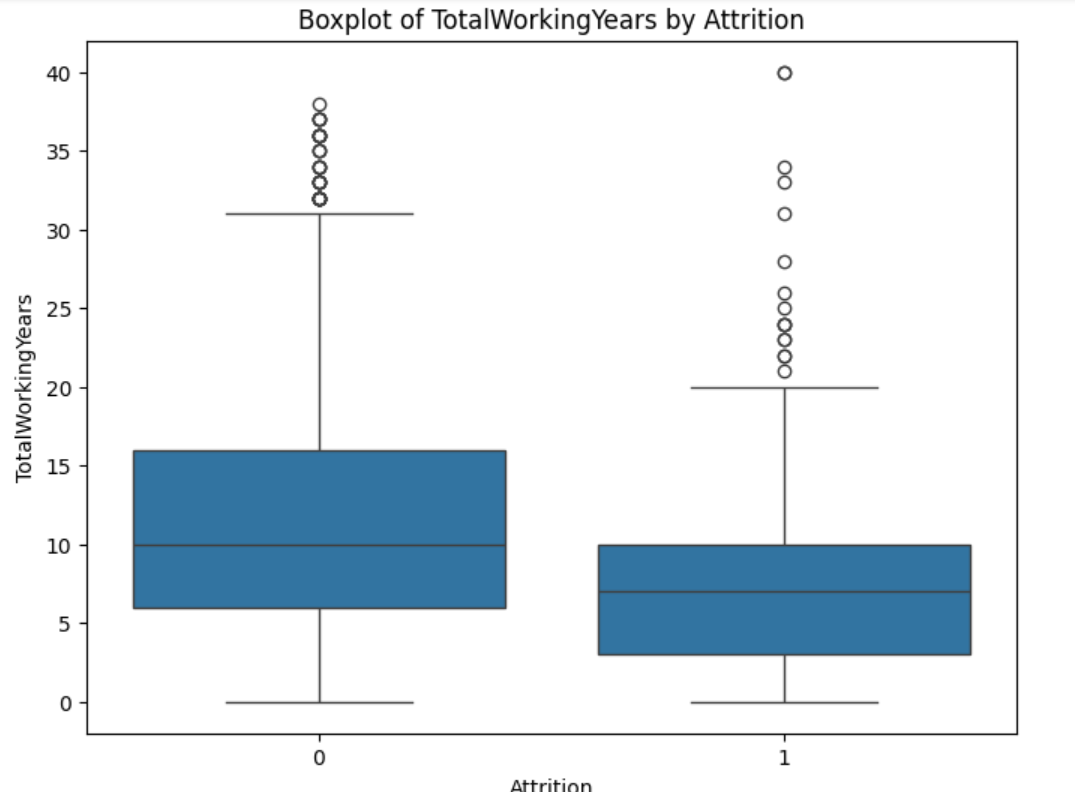

**1.1.3. Plot the relative frequency of Attrition values (Yes/No)  (0.3 points)**

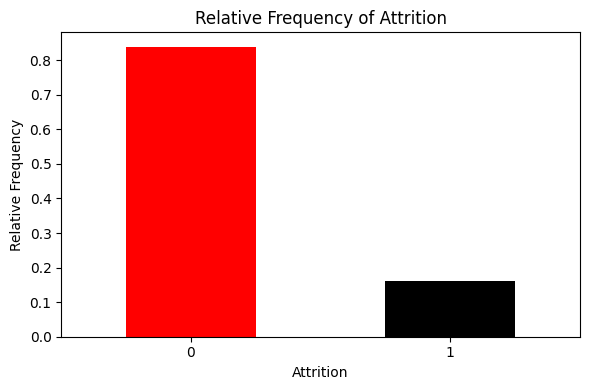

In [5]:
attrition_counts = hr_data['Attrition'].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
attrition_counts.plot(kind='bar', color=['red', 'black'])
plt.title('Relative Frequency of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Relative Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<font color='red'> **Answer:**</font>

## 1.2 Classification  (7.8 points)

**1.2.1 We will predict the variable ```Attrition``` by applying different classification algorithms and compare them. But before that we have to split the data into training and test set. And before splitting the dataset, please perform the following preprocessing. (0.5 points)**
* One hot encoding (You probably performed this in ```1.1.0```, in case if you have not)
* Drop three columns with least correlation values. (Use the plot from ```1.1.0```)
* Be a vigilante, and look for columns that has suspicious values. Drop those columns (at least 2 columns), it will not be much of a help in classification.
* Finally normalize the training variables, use the following Z-Score normalizing equation for normalization; <br>

$$x_{norm}= \frac{x -\mu}{\sigma}.$$ <br>

Here, $\mu$ = mean of the training variables, $\sigma$ = standard deviation of the training variables. <br>

What is **Z-score**: It is a a scaling method that represents the number of standard deviations away from the mean. You would use z-score to ensure your feature distributions have mean = 0 and std = 1. It’s useful when there are a few outliers, but not so extreme that you need clipping. Clipping is another technique when you clip off (remove) outliers by visualizing the distribution of your dataset [1]. the following figure shows how Z-score impacts the values, notice the x-axis for both the figures.
<img src="https://developers.google.com/static/machine-learning/data-prep/images/norm-z-score.svg" alt="img" border="0"></a><br />
Ref: https://developers.google.com/machine-learning/data-prep/transform/normalization

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


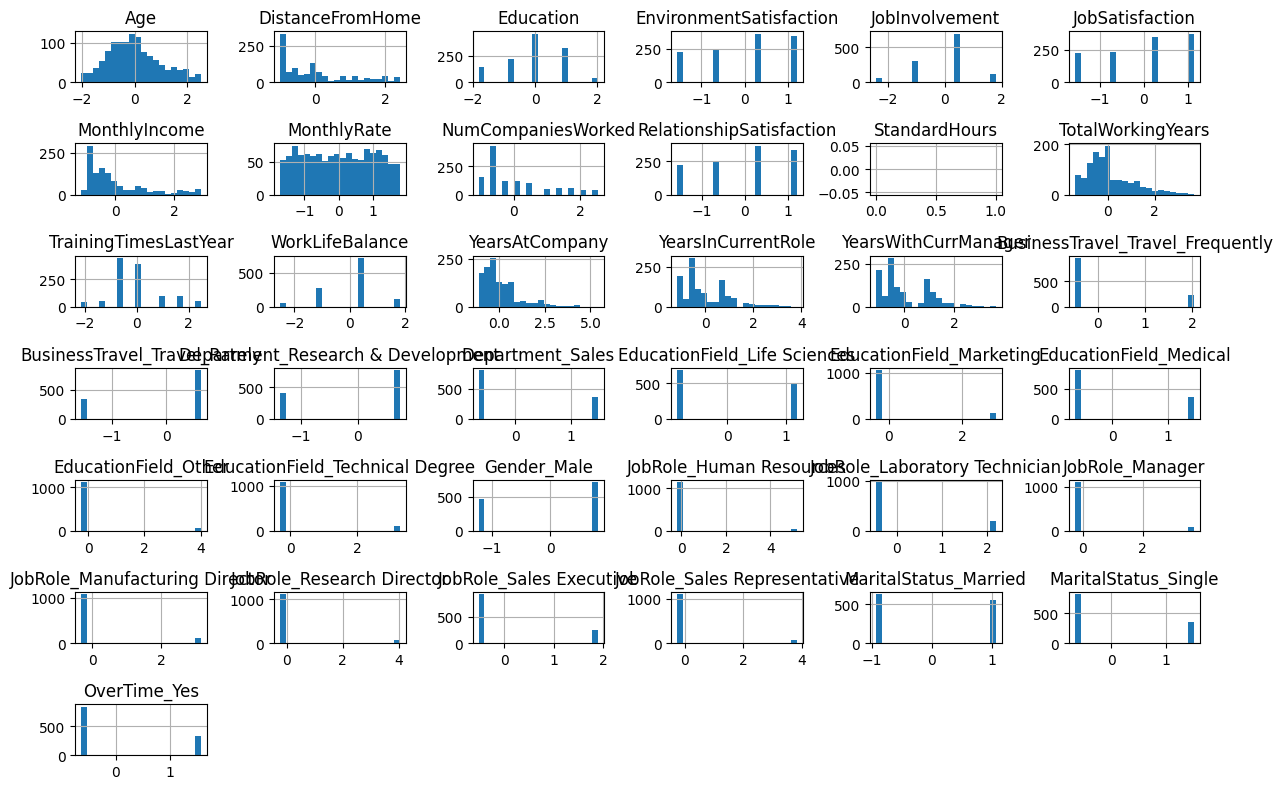

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#TODO: one hot encoding
categorical_cols = hr_data.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
encoded_data = encoder.fit_transform(hr_data[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols), index=hr_data.index)
hr_data.drop(columns=categorical_cols, inplace=True)
hr_data = pd.concat([hr_data, encoded_df], axis=1)

#TODO: drop three columns with least correlation
correlations = hr_data.corrwith(hr_data['Attrition']).abs().sort_values()
columns_to_drop = correlations.index[:3]
hr_data = hr_data.drop(columns=columns_to_drop)
#TODO: drop suspicious columns (there should be at least two)
#daily rate, monthly rate and hourly rate all of them have diff correlations so seem suspicious
hr_data = hr_data.drop(columns=['DailyRate'])
#years since last promotion seems weird
hr_data = hr_data.drop(columns=['YearsSinceLastPromotion'])

#TODO: split the dataset
X = hr_data.drop('Attrition', axis=1)  # Features
y = hr_data['Attrition']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80-20 split

# 2. Normalize training variables (Z-score)
X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train_normalized = (X_train - X_train_mean) / X_train_std

X_train_normalized.hist(figsize=(12, 8), bins=20)  # Adjust figsize and bins as needed
plt.title('Distribution of Normalized Features (Z-scores)')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


<font color='red'> **Answer:**</font>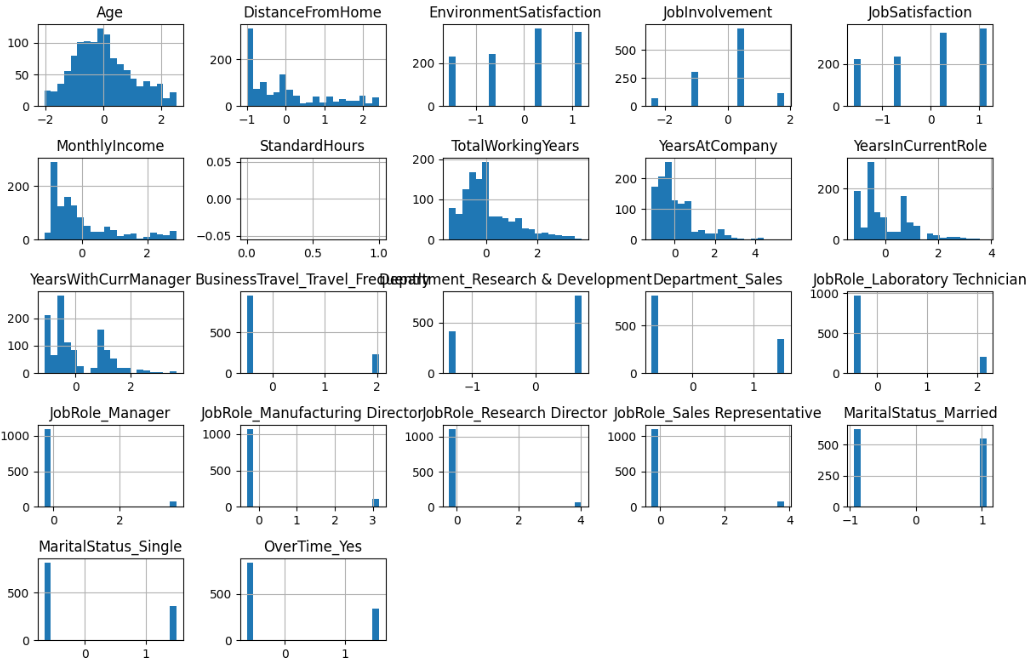

**1.2.2 Use the scikit-learn DecisionTreeClassifier with default parameters to predict the attrition value for the test set. Set the random seed to 0. Calculate the accuracy score and print it. (0.5 points)**

In [7]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics


model = DT(random_state=0)
#TODO: train the model
model.fit(X_train_normalized, y_train)
#TODO: predict on test set
X_test_normalized = (X_test - X_train_mean) / X_train_std
y_pred = model.predict(X_test_normalized)
#TODO: print accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7993


<font color='red'> **Answer:**</font>Accuracy: 0.8299

**1.2.3 Plot the confusion matrix for the predicted values. Why accuracy is not a good metric to use in this case ? (0.4 points)**

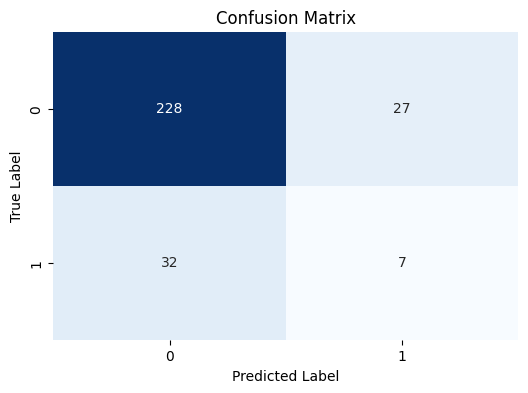

In [8]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true and predicted labels
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**<font color='red'>Answer:</font>**dataset is imbalanced — meaning that one class (likely "No Attrition" or class 0) occurs much more frequently than the other (class 1, "Yes Attrition").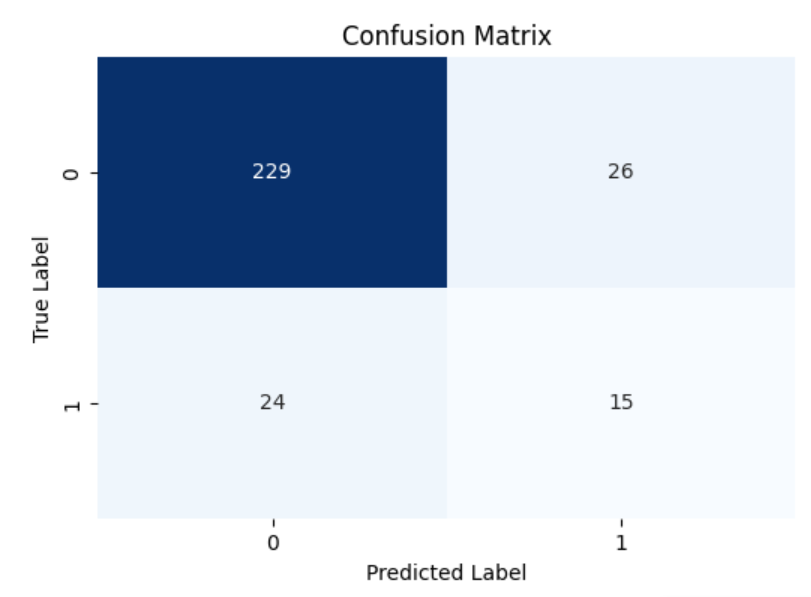

**1.2.4 Formulate a dummy model (not a machine learning approach) to get atleast 80% accuracy. Considering the label ratios how this model would look like? Be creative. You do not require to code for this, just a simple assumption and mathematical proof is necessary. (0.5 points)** <br>
Hint: There are two labels (yes, no) in your data.

**<font color='red'>Answer:</font>**
From the confusion matrix:

Total samples = 229 (TN) + 26 (FP) + 24 (FN) + 15 (TP) = 294

Class 0 ("No Attrition") = 229 + 26 = 255

Class 1 ("Attrition") = 24 + 15 = 39

So:

% of class 0 = 255 / 294 ≈ 86.7%

% of class 1 = 39 / 294 ≈ 13.3%

Let’s assume a very naive model that always predicts class 0 (No Attrition).

In this case:

It will correctly predict all class 0 samples → 255 correct

It will incorrectly predict all class 1 samples → 39 wrong

So, total correct predictions = 255 Total samples = 294

Accuracy = 255 / 294 ≈ 86.7%

Even this simple dummy model (always predict “No Attrition”) gives 86.7% accuracy, which is more than 80% — just by exploiting the class imbalance.

**1.2.5 Use export_graphviz from sklearn.tree to visualize the trained decision tree of ```1.2.2```. (0.4 points)**

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


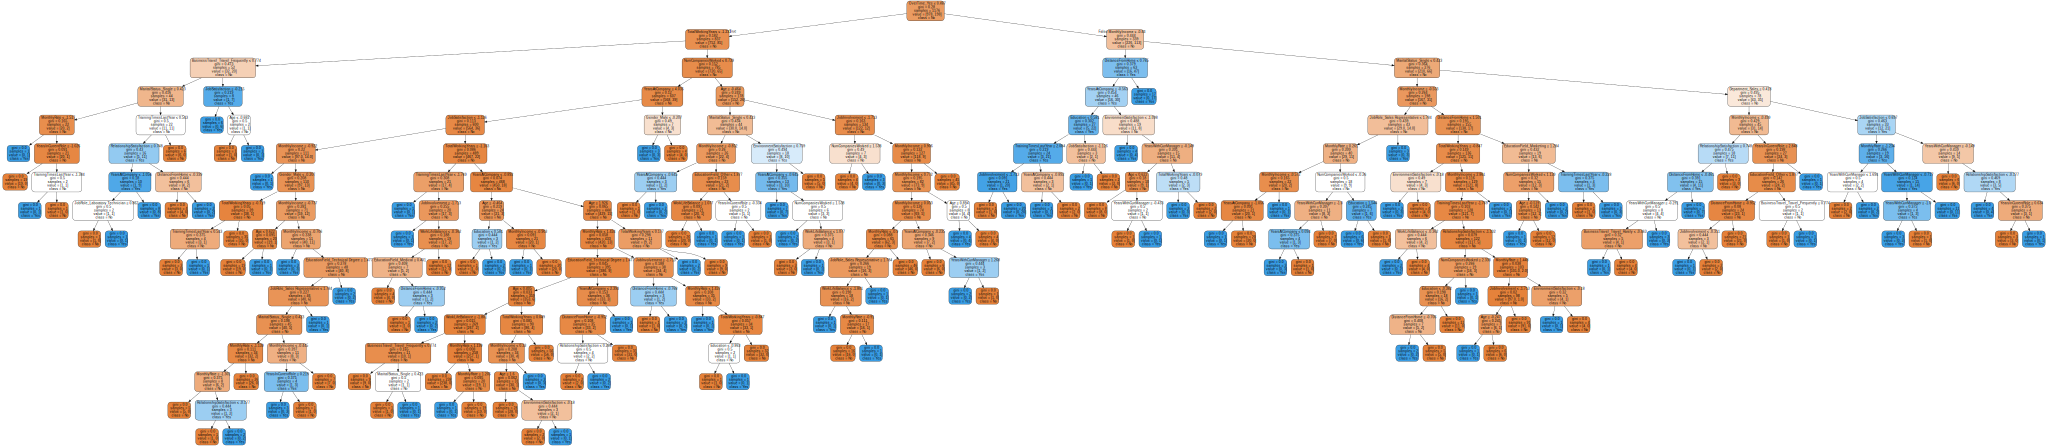

In [9]:
!apt-get install graphviz
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

# Assuming your trained Decision Tree model is named 'model'
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X_train_normalized.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph

<font color='red'> **Answer:**</font>

**1.2.6 Look at the visualization, what is the most important factor to decide if an employee is going to leave or not? (0.4 points)**

**<font color='red'>Answer:</font>**OverTime has the strongest positive correlation so this is the most important factor.


**1.2.7 Plot the classification report for the same decision tree. Which evaluation metrics out of precision and recall, would you consider for this specific case-study? Please elaborate your answer. (0.5 points)**

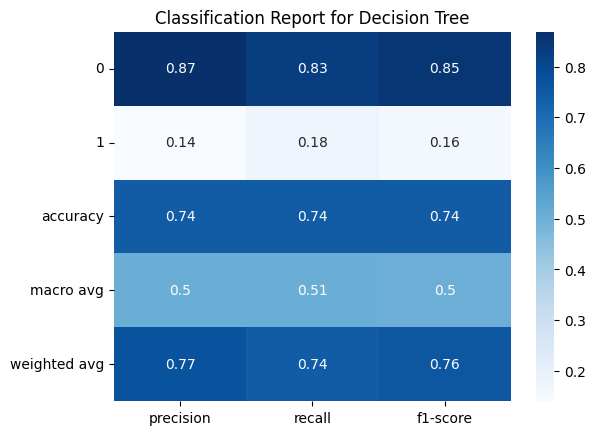

In [12]:
from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test, model.predict(X_test), output_dict=True)

# Plot the classification report
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report for Decision Tree')
plt.show()

**<font color='red'>Answer:</font>**Recall:In an imbalanced two‑class problem like this—where “class 1” makes up only a small fraction of the data and is (presumably) the event we most care about—you almost always want to push up your recall on that minority class.


**1.2.8 Calculate the F1 score of the model in training data and compare it with the F1 score in test  data. What is the phenomenon known as? (0.4 points)**

In [14]:
from sklearn.metrics import f1_score

# Calculate F1 score on training data
f1_train = f1_score(y_train, model.predict(X_train))

# Calculate F1 score on test data
f1_test = f1_score(y_test, model.predict(X_test))

# Print the F1 scores
print("F1 Score on Training Data:", f1_train)
print("F1 Score on Test Data:", f1_test)

F1 Score on Training Data: 0.3177083333333333
F1 Score on Test Data: 0.15730337078651685


**<font color='red'>Answer:</font>**F1 Score on Training Data: 0.3177083333333333
F1 Score on Test Data: 0.15730337078651685

Typically, you will observe that the F1 score on the training data is higher than the F1 score on the test data. This phenomenon is known as overfitting.

**1.2.9 Use cross validation score to ensure that our model is generalizing well. Try different combinations of maximum depth parameters for the decision tree and choose the best while using cross validation. Please complete the code below and report the best maximum depth. (0.5 points)**

In [16]:
from sklearn.model_selection import cross_val_score
best_score = 0
best_depth = 0

for i in range(1,11):
    clf = DT(max_depth=i, random_state = 0)
    #TODO: Perform 5-fold cross validation.
    scores = cross_val_score(clf, X, y, cv=5, scoring='f1')
    #set scoring metrics to f1

    #TODO: calculate the mean score (f1)
    mean_score = scores.mean()
    #TODO: compare the mea scores to find the best depth
    if mean_score > best_score:
        best_score = mean_score
        best_depth = i
    print('Mean score', mean_score)

print('\n The best tree depth is: ', best_depth )

Mean score 0.03636363636363636
Mean score 0.2658385428685762
Mean score 0.2845424861289483
Mean score 0.32456552138390404
Mean score 0.3591155084730685
Mean score 0.3211437685121895
Mean score 0.3482597925327163
Mean score 0.3083425287487755
Mean score 0.3246181898611943
Mean score 0.3028425010422291

 The best tree depth is:  5


<font color='red'> **Answer:**</font>
Mean score 0.03636363636363636
Mean score 0.2658385428685762
Mean score 0.2845424861289483
Mean score 0.32456552138390404
Mean score 0.3591155084730685
Mean score 0.3211437685121895
Mean score 0.3482597925327163
Mean score 0.3083425287487755
Mean score 0.3246181898611943
Mean score 0.3028425010422291

 The best tree depth is:  5

**1.2.10 Use SVM with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. Set the random_state equal to 0. (0.5 points)**

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
svm_model = SVC(random_state=0)

#TODO: train the model
svm_model.fit(X_train, y_train)
#TODO: predict on test set
y_pred = svm_model.predict(X_test)
#TODO: calculate the metrics
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)


Accuracy:  0.8673469387755102
Recall:  0.0
Precision:  0.0
F1_score:  0.0
AUC:  0.5


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<font color='red'> **Answer:**</font>
Accuracy:  0.8673469387755102
Recall:  0.0
Precision:  0.0
F1_score:  0.0
AUC:  0.5

**1.2.11 Use Logistic Regression with default parameters to classify test data and report accuracy, recall, precision, f1-score, AUC. Set the random_state equal to 0 (0.5 points)**

In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

#TODO: train the model
lr.fit(X_train, y_train)
#TODO: predict on test set
y_pred = lr.predict(X_test)
#TODO: calculate the metrics
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
#print('F1_score: ', f1)
print('AUC: ', auc)

Accuracy:  0.8537414965986394
Recall:  0.0
Precision:  0.0
AUC:  0.49215686274509807


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<font color='red'> **Answer:**</font>
Accuracy:  0.8537414965986394
Recall:  0.0
Precision:  0.0
F1_score: 0.0
AUC:  0.49215686274509807

**1.2.12 One of the parameters for the Logistic regression is tol which sets the tolerance for the stopping criteria. We are going to calculate the log loss metric for different values of tol. Please fill in the code below and plot the log loss values. Which one of tol values is better for our model based on log loss? (0.5 points)**


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

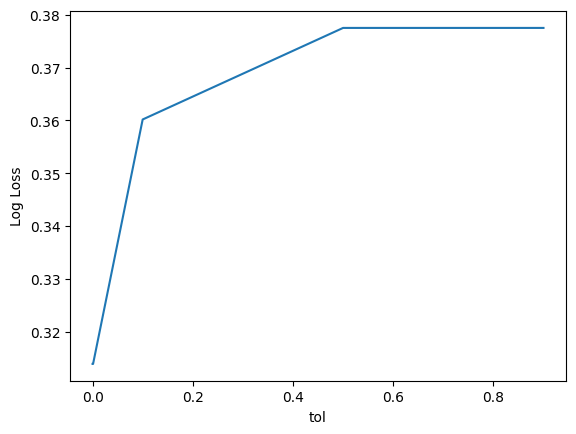

Best Tolerance, tol, Value:  0.001


In [28]:
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

log_losses = []
for tol in [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]:

    #TODO: initialize the model
    model = LR(tol=tol, solver='lbfgs', max_iter=1000, random_state=42)
    #TODO: train the models
    model.fit(X_train, y_train)
    #TODO: predict on test set
    y_pred_proba = model.predict_proba(X_test)
    #TODO: calculate logloss
    current_log_loss = log_loss(y_test, y_pred_proba)
    #TODO: use log_loss list to store the different logloss for different tol
    log_losses.append(current_log_loss)

tol = [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]
plt.plot(tol, log_losses)
plt.ylabel("Log Loss")
plt.xlabel("tol")
plt.show()


#Findidng out the best tolerance value
min_index=(log_losses.index(min(log_losses)))
print("Best Tolerance, tol, Value: ", tol[min_index])

<font color='red'> **Answer:**</font>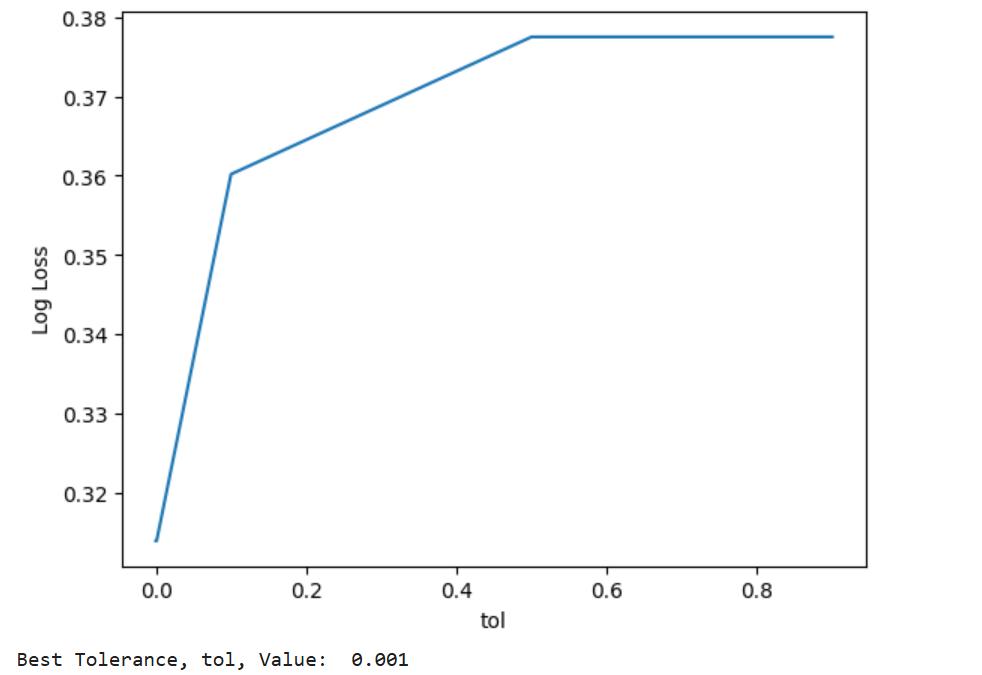

**1.2.13 Use Random Forest with default parameters to classify test data and report accuracy, recall, precision and f1-score and AUC. Set the random_state equal to 0. Please build as well a classification report separately which shows the metrics for each class. (0.5 points)**

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)

#TODO: train the model
rf_model.fit(X_train, y_train)
#TODO: predict on test set
y_pred = rf_model.predict(X_test)
#TODO: calculate the metrics
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
#f1_score = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
#print('F1_score: ', f1_score)
print('AUC: ', auc)
#TODO: classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Accuracy:  0.8775510204081632
Recall:  0.10256410256410256
Precision:  0.8
AUC:  0.5493212669683258

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294



<font color='red'> **Answer:**</font>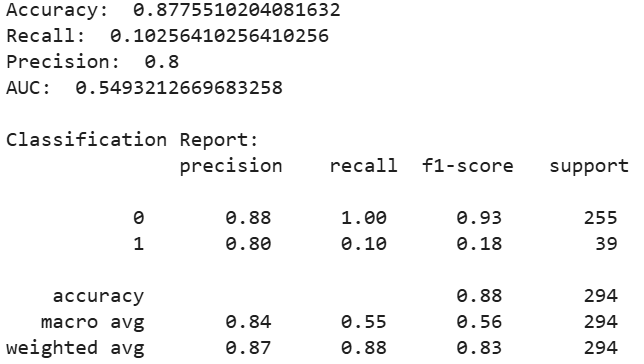

**1.2.14 Use the model from ```1.2.13```, calculate the predicted probability on test set. Threshold the probabilities such that it will output the class 'No'  only if the probability is 70% or higher. Otherwise, it will predict 'Yes'. (0.3 points)**


In [31]:
#TODO: predict probability on test set
y_pred_proba = rf_model.predict_proba(X_test)
#TODO: threshold probability
no_probabilities = y_pred_proba[:, 0]
y_pred_threshold = ... #use this variable to store value
y_pred_threshold = np.where(no_probabilities >= 0.7, 'No', 'Yes')

print(y_pred_threshold)

['No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'

<font color='red'> **Answer:**</font>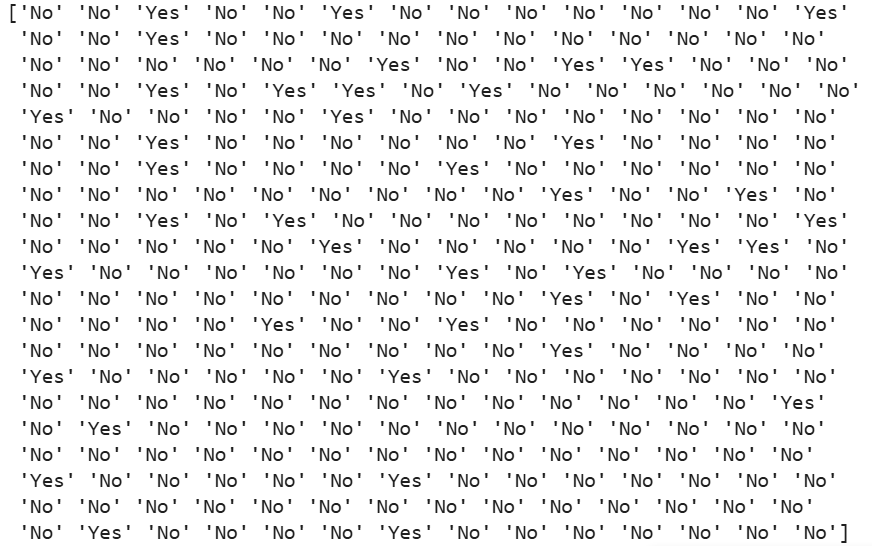

**1.2.15 Print the classification report again. Do you think there were some improvements regarding the classification for class Yes? Explain your answer briefly. (0.4 points)**

In [35]:
report = classification_report(y_test, y_pred_threshold)
print("\nClassification Report with Modified Predictions:\n", report)

ValueError: Mix of label input types (string and number)

**<font color='red'>Answer:</font>**

**1.2.16 Use XGBoost with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. (0.5 points)**

In [37]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

#TODO: train the model
xgb_model.fit(X_train, y_train)
#TODO: predict on test set
y_pred = xgb_model.predict(X_test)
#TODO: calculate the metrics
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
#f1_score = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
#print('F1_score: ', f1_score)
print('AUC: ', auc)

Accuracy:  0.8673469387755102
Recall:  0.28205128205128205
Precision:  0.5
AUC:  0.6194570135746605


<font color='red'> **Answer:**</font>

**1.2.17 For unbalanced datasets, choose the best classifier (based on evaluation metrics that seems good for this case-study) and plot its feature importances in decreasing order. Were the 3 most important features as you expected, you can use ```1.2.5``` as reference? Please explain why. (0.5 points)**

In [ ]:
#TODO: choose a model
#TODO: train the model

#TODO: predict on test set
#TODO: calculate the metrics

#TODO: feature importance calculation

#TODO: plot the feature importance


**<font color='red'>Answer:</font>**

# 2. Improving classification (2.5 points)

**2.1 Do you think it is better to try oversampling or downsampling in this case study and why ? (0.4 points)**

**<font color='red'>Answer:</font>**
Oversampling, specifically SMOTE, is likely better.

Reasons:

Avoids data loss from downsampling.
Focuses on learning the important minority class ('Yes').
SMOTE creates synthetic samples effectively.

**2.2 Apply oversampling to the data while keeping random_state equal to 0. (0.4 points)**

In [38]:
from imblearn.over_sampling import RandomOverSampler
#TODO: apply oversampling
ros = RandomOverSampler(random_state=0)

# Apply RandomOverSampler to the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

<font color='red'> **Answer:**</font>

**2.3 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Train a random forest model, test it and report accuracy, precision, recall, f1-score and AUC. (0.5 points)**

In [39]:
# Split the data into train and test sets (80/20 ratio, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize RandomOverSampler with random_state=0
ros = RandomOverSampler(random_state=0)

# Apply RandomOverSampler to the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate metrics
acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Print metrics
print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)


TypeError: 'float' object is not callable

<font color='red'> **Answer:**</font>

**2.4 Apply undersampling to the data while keeping random_state equal to 0. (0.4 points)**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#TODO: apply undersampling

<font color='red'> **Answer:**</font>

**2.5 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Train a random forest model, test it and report accuracy, precision, recall, f1-score and AUC. (0.5 points)**

In [ ]:
#TODO: split dataset in 80/20 ratio. set random_state=0, use randomforest model
#TODO: train a rf model on undersampled data
#TODO: predict on test set
#TODO: calculate metrics

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)



<font color='red'> **Answer:**</font>

**2.6 Which one performed better between over and under sampling (0.3 points)**

<font color='red'> **Answer:**</font>

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer:**</font>



## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:** </font>

## Any other comments regarding the homework?

<font color='red'> **Answer:** </font>